In [31]:
# Import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
from math import sqrt

In [5]:
bmw=pd.read_csv("/Users/Bayu/Downloads/bmw.csv")

In [6]:
bmw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [9]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [7]:
#Data Optimization
Model = bmw['model'].apply(lambda x : x.split(' ')[1])
bmw.insert(1,"Model",Model)
bmw.drop(['model'],axis=1,inplace=True)

bmw

,Model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [8]:
#Data Optimization
bmw_1=bmw.loc[(bmw.year==2016)&(bmw.Model == '5')&(bmw.transmission=='Automatic')&(bmw.fuelType=='Diesel')&(bmw.engineSize==2.0)&(bmw.mileage<=80000)&(bmw.price>=13000)&(bmw.tax==30)]
bmw_1.head()

,Model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73,5,2016,14400,Automatic,51552,Diesel,30,62.8,2.0
87,5,2016,15000,Automatic,39235,Diesel,30,62.8,2.0
105,5,2016,13500,Automatic,64117,Diesel,30,65.7,2.0
111,5,2016,13600,Automatic,65612,Diesel,30,62.8,2.0
2345,5,2016,14280,Automatic,52889,Diesel,30,62.8,2.0


In [10]:
#Data cleaning
Bmw=bmw_1.drop(columns=["Model",'year','transmission','fuelType','tax','mpg','engineSize'])
Bmw

,price,mileage
73,14400,51552
87,15000,39235
105,13500,64117
111,13600,65612
2345,14280,52889
3831,14550,56320
4069,14950,49650
7545,14050,59000
7605,13990,57000
7617,15690,34000


Text(0.5, 1.0, 'Scatter Plot')

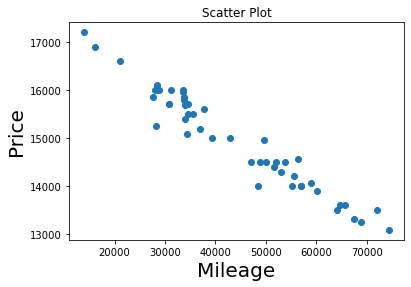

In [11]:
#Draw a scatter Plot to see relationship between the variables
x=Bmw[['mileage']].values # predictor 
y=Bmw['price'].values #response or output variable
plt.scatter(x,y)
plt.xlabel('Mileage' ,fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Scatter Plot')

In [12]:
#Data Optimization
mileage_n = Bmw['mileage'].apply(lambda x : -(x))
Bmw.insert(2,"mileage_n",mileage_n)
Bmw.head()

,price,mileage,mileage_n
73,14400,51552,-51552
87,15000,39235,-39235
105,13500,64117,-64117
111,13600,65612,-65612
2345,14280,52889,-52889


Text(0.5, 1.0, 'Scatter Plot')

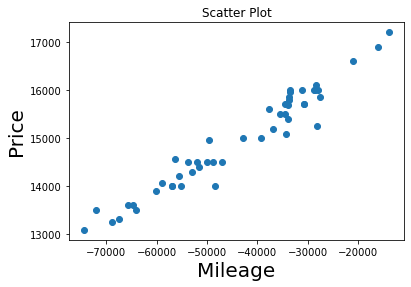

In [13]:
#Draw a scatter Plot to see relationship between the variables
x=Bmw[['mileage_n']].values # predictor 
y=Bmw['price'].values #response or output variable
plt.scatter(x,y)
plt.xlabel('Mileage' ,fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Scatter Plot')

In [24]:
#Split Data set 
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [25]:
#Model Developement 
lr=LinearRegression()
mdl=lr.fit(x_train,y_train)
print('The Coefficients for this model is ',mdl.coef_)
print('The Intercept for this model is',mdl.intercept_)
#For Train Data 
y_train_pred=mdl.predict(x_train)
mse_train=mean_squared_error(y_train,y_train_pred)
#For Test Data 
y_test_pred=mdl.predict(x_test)
mse_test=mean_squared_error(y_test,y_test_pred)

The Coefficients for this model is  [0.06618477]
The Intercept for this model is 17868.831671848286


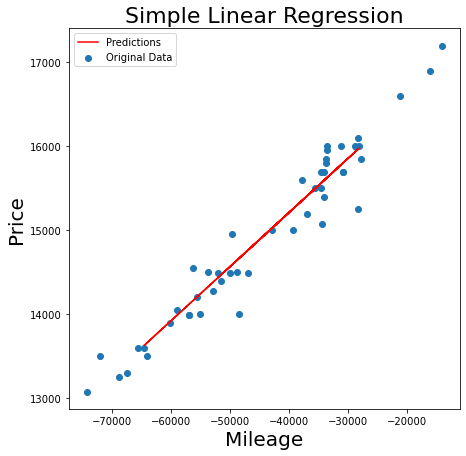

In [20]:
#Visualization Linear Regression Plot
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(x,y,label='Original Data')
plt.plot(x_test,y_test_pred,color='red',label='Predictions')
plt.xlabel('Mileage' ,fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Simple Linear Regression',fontsize=22)
ax.legend()

In [26]:
#Calculating R^2 Score
print(r2_score(y_test,y_test_pred))

0.9538768195742009


In [34]:
mileage_testn=int(input('Jarak tempuh mobil :'))
mileage_test=[[-mileage_testn]]
price=mdl.predict(mileage_test)
print('kisaran harga mobil yaitu %1.2f USD'%price)

Jarak tempuh mobil :20000
kisaran harga mobil yaitu 16545.14 USD


In [32]:
rmse=sqrt(mse_test)
rmse

249.84701269339084